In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression


In [3]:
df = pd.read_csv('./data/churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [5]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
df["Int'l Plan"] = df["Int'l Plan"].map({"yes":1,"no":0})
df["VMail Plan"] = df["VMail Plan"].map({"yes":1,"no":0})
df["Churn?"] = df["Churn?"].map({"True.":1,"False.":0})
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
y=df["Churn?"]

In [8]:
X=df.iloc[:,:-1]
X.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [9]:
X=X.drop(columns=["State","Phone"])

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [11]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9520383693045563

C:\Users\jeramirez\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


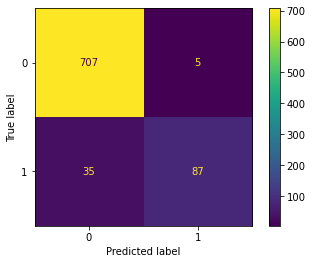

In [12]:

plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [13]:
y_hat = model.predict(X_test)

In [14]:
precision_score(y_test,y_hat),recall_score(y_test,y_hat)

(0.9456521739130435, 0.7131147540983607)

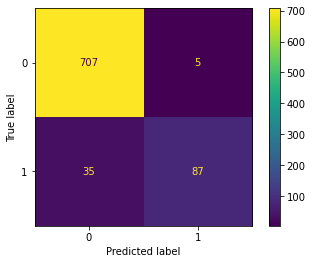

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_hat)
plt.show()

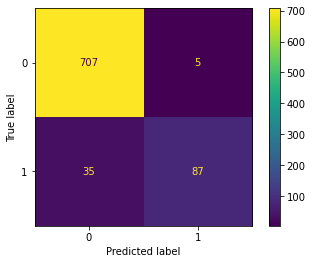

In [16]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.show()

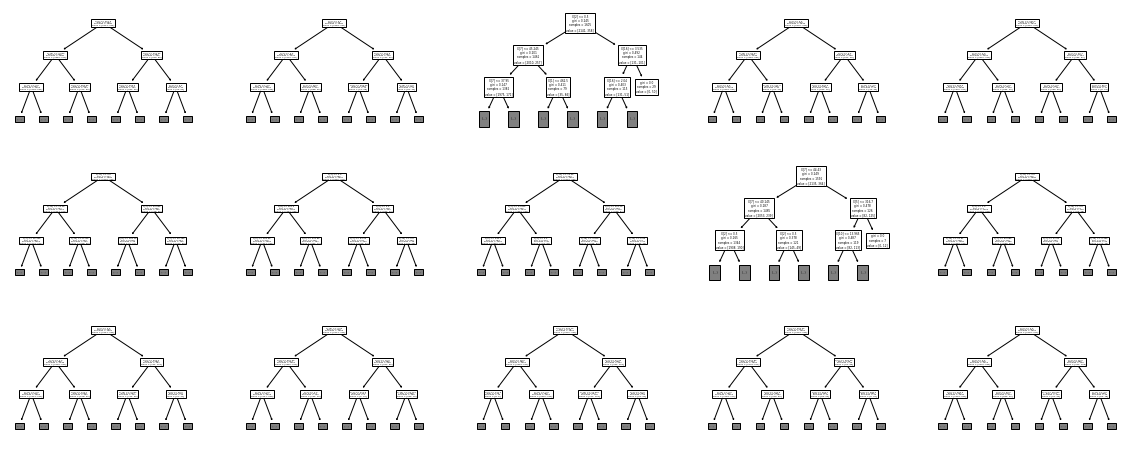

In [17]:
fig, axs = plt.subplots(3,5,figsize=(20,8)) 
axs = axs.flatten()
for i in range(15):
    tree = model.estimators_[i]
    plot_tree(model.estimators_[i],max_depth=2,ax=axs[i])

In [27]:
trees = np.arange(1,51)
accuracy = np.empty(50)

for i in range(50):
    model = RandomForestClassifier(n_estimators= trees[i]).fit(X_train,y_train)
    accuracy_v = model.score(X_test,y_test)
    accuracy[i] = accuracy_v
    
print(accuracy)
    
    

[0.91127098 0.90407674 0.92805755 0.92446043 0.92565947 0.94244604
 0.9352518  0.94004796 0.95203837 0.93165468 0.94604317 0.94244604
 0.95323741 0.93764988 0.94604317 0.94244604 0.94844125 0.941247
 0.95683453 0.94004796 0.95323741 0.94484412 0.94844125 0.95083933
 0.94844125 0.95083933 0.941247   0.94244604 0.95443645 0.95203837
 0.95683453 0.94724221 0.95323741 0.95323741 0.94844125 0.95083933
 0.94604317 0.94724221 0.94964029 0.94844125 0.95923261 0.94964029
 0.94724221 0.94604317 0.94724221 0.94844125 0.95563549 0.94484412
 0.95203837 0.95203837]


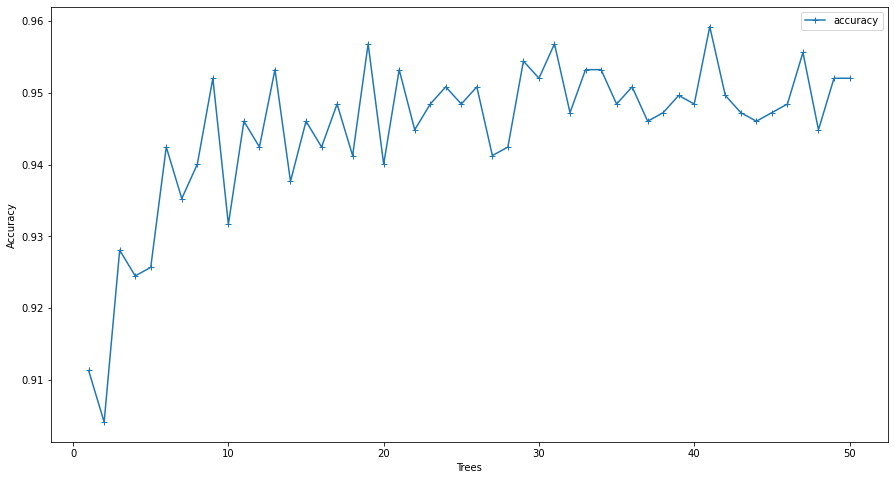

In [28]:
plt.figure(figsize=(15,8))
plt.plot(trees,accuracy,label="accuracy",marker = "+")
plt.xlabel("Trees")
plt.ylabel("Accuracy")
plt.legend()



In [29]:
accuracy_f = []
features = len(X_train.columns)
r_features = range(1,features)

for i in r_features:
    model = RandomForestClassifier(max_features=i,n_estimators=33).fit(X_train,y_train)
    accuracy_f.append(model.score(X_test,y_test))
    

In [30]:
accuracy_f

[0.8932853717026379,
 0.9268585131894485,
 0.9496402877697842,
 0.9544364508393285,
 0.9508393285371702,
 0.9544364508393285,
 0.9508393285371702,
 0.9556354916067147,
 0.9532374100719424,
 0.9496402877697842,
 0.9532374100719424,
 0.9520383693045563,
 0.9556354916067147,
 0.9556354916067147,
 0.9496402877697842,
 0.947242206235012,
 0.9496402877697842]

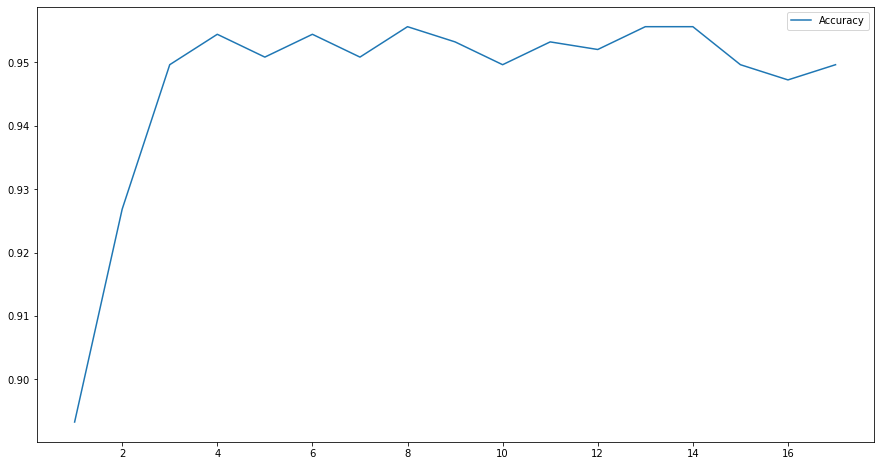

In [32]:
plt.figure(figsize=(15,8))
plt.plot(r_features,accuracy_f,label="Accuracy")
plt.legend()

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
params = {"n_estimators":range(30,40,2),
         "criterion":["gini","entropy"],
         "max_depth":list(range(1,3))+[None],
         "max_features":["log2","sqrt"],
         }
model = RandomForestClassifier()
gs = GridSearchCV(model,params,cv=5,n_jobs=1,verbose=1)
gs.fit(X_train,y_train)
gs.best_score_,gs.best_params_


Fitting 5 folds for each of 60 candidates, totalling 300 fits


(0.952380761523046,
 {'criterion': 'entropy',
  'max_depth': None,
  'max_features': 'sqrt',
  'n_estimators': 32})

In [20]:
lor = LogisticRegression(max_iter = 100).fit(X_train,y_train)
lor.score(X_test,y_test)

C:\Users\jeramirez\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8585131894484412

In [21]:
lir = LinearRegression().fit(X_train,y_train)
lir.score(X_test,y_test)

0.13964451677103373

In [22]:
lor_t = LogisticRegression(max_iter = 1000,class_weight="balanced").fit(X_train,y_train)
lor_t.score(X_test,y_test)

C:\Users\jeramirez\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7637889688249401